In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [87]:
data = pd.read_csv("dataset/marks.txt", sep=",")
data.head()

,Marks_1,Marks_2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [88]:
x = data[["Marks_1", "Marks_2"]]
y = data["Result"]

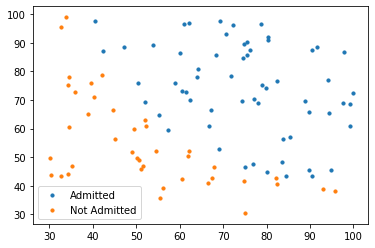

In [89]:
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
model = LogisticRegression()

In [92]:
trained_model = model.fit(x_train, y_train)

In [93]:
prediction_train = trained_model.predict(x_train)
prediction_test = trained_model.predict(x_test)

In [94]:
print("Training Accuracy: ", accuracy_score(y_train, prediction_train))

Training Accuracy:  0.9125


In [95]:
print("Test Accuracy: ", accuracy_score(y_test, prediction_test))

Test Accuracy:  0.85


In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



In [97]:
trained_model.classes_

array([0, 1])

In [98]:
trained_model.coef_

array([[0.19937666, 0.19332517]])

In [99]:
trained_model

LogisticRegression()

In [83]:
from matplotlib.colors import ListedColormap

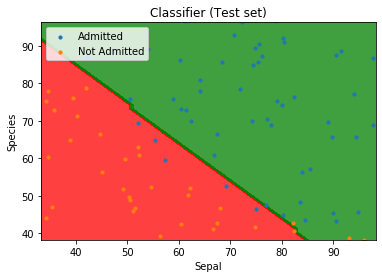

In [101]:
X1, X2 = np.meshgrid(np.arange(start = x_test["Marks_1"].min() - 1,  
                               stop = x_test["Marks_1"].max() + 1, step = 1), 
                     np.arange(start = x_test["Marks_2"].min() - 1,  
                               stop = x_test["Marks_2"].max() + 1, step = 1)) 
plt.contourf(X1, X2, trained_model.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
      
plt.title('Classifier (Test set)') 
plt.xlabel('Sepal') 
plt.ylabel('Species') 
plt.legend() 
plt.show()

In [104]:
param = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

newton-cg


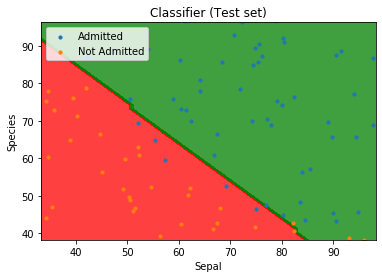

lbfgs


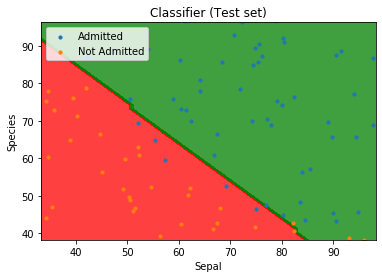

liblinear


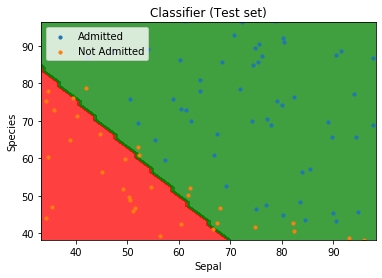

sag


/home/ritik/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


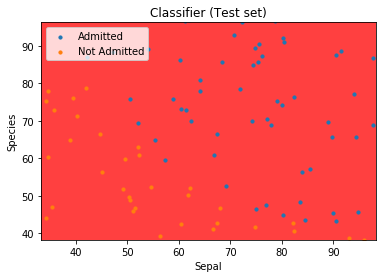

saga


/home/ritik/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


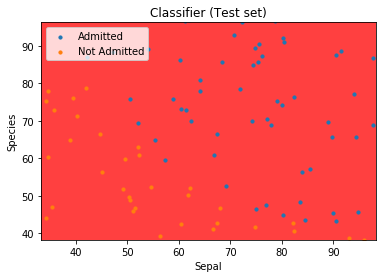

In [106]:
for i in param:
    print(i)
    model = LogisticRegression(solver=i)
    trained_model = model.fit(x_train, y_train)
    
    X1, X2 = np.meshgrid(np.arange(start = x_test["Marks_1"].min() - 1,  
                               stop = x_test["Marks_1"].max() + 1, step = 1), 
                     np.arange(start = x_test["Marks_2"].min() - 1,  
                               stop = x_test["Marks_2"].max() + 1, step = 1)) 
    plt.contourf(X1, X2, trained_model.predict( 
                 np.array([X1.ravel(), X2.ravel()]).T).reshape( 
                 X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 

    plt.xlim(X1.min(), X1.max()) 
    plt.ylim(X2.min(), X2.max()) 

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

    plt.title('Classifier (Test set)') 
    plt.xlabel('Sepal') 
    plt.ylabel('Species') 
    plt.legend() 
    plt.show()
    
    